# Group 5 - Flight Delay Prediction

### Group Members:

1. Muhamad Azim Bin Muhamad Kamal – 17120986
2. Samuel Ing Shiing Wong - S2018282
3. Wai Zhen Chin - S2018134
4. Kumanan A/L N Govaichelvan – 17096921
5. Asyraf Najmie Bin Abd Rahman - S2000949

# Initial Questions

1. Is it possible to use machine learning to predict flight delay?
2. Is there any correlation between flight informations and the probability of the flight being delayed?

# Overview and Motivation


<img src="delay-2.jpg" width="300" height="400">

When it comes to travelling, people are so excited and get thrilled about what they are going to experience during their journey. Therefore, a lot of travel arrangement has been made such as choosing the best hotel for the best view of the city, opt for the preferred airline and select for the preferred seat in order to get full comfort of travel experience. 

However, things went differently when you reached the airport, you end up being informed that **your aircraft has been delayed**, forcing the airline to deploy another aircraft. This means you lost your preferred seat and part of your planning has been deferred due to the late departure.


#### Imagine that what would it be if all of these things can be predicted and you are being informed for the travel delay when you checked in? 

#### For Passengers:
- Have more time to request for flight delay compensation or renegotiate with the airline and also reschedule their travel arrangement

#### For Airlines:
- Capable of optimizing flight operations and minimize delays for better usability of aircraft and better revenue generation

#### For Airport Operators:
- Have better insight on what aircraft should be prepared and which landing slot available for the delayed aircraft which leads to smooth airport operation

# Related Work

Flight delays has become a frequent and complicated phenomenon, as it happens due to many reasons such as problems at the origin airport, at the destination airport, or a combination of ground and air traffic reasons. Although the problem may seem complex to comprehend, it is still measurable enough to analyze flight delays with decent accuracy. Within the complexity of the problem, generally there are some patterns of flight delays exist.

In the paper <b>Airline Delay Predictions using Supervised Machine Learning (Prabakaran et al, 2018)</b>, the primary goal is set which is to predict airline delays caused by various factors. A range of statistical techniques encompassing supervised machine learning and data mining that studied the current and historical data are used to carry out predictive analysis. The dataset of 2017 flight delays and cancellations was used for the study and was taken from the website of the U.S. Department of Transportation (DOT) Bureau of Transportation Statistics (BTS).

The prediction is retrieved using a three-week window that will predict the delays for the following week. Two models were developed for regression analysis: One Airport – One Airline and One Airline – All Airports. Both models were analyzed using linear, polynomial, and multiple regression analyses. Mean square error (MSE) and root mean square error (RMSE) were applied to test out the accuracy of the models. The quality of the models was assessed by the MSE values, with the smaller the values are, the closer the fit is to the real data. It is determined that the MSE value for Model 1 is 108.6713 and the MSE values for Model 2 are 53.7430 for Linear Regression fit and 49.5025 for Polynomial Regression fit.

In the paper <b>Flight Delay Prediction Using Machine Learning Algorithm XGBoost (Surya Teja et al, 2019)</b>, the implementation of XGBoost algorithm was explored to predict flight delays using the same 2015 flight delays and cancellation dataset. XGBoost is one of the most popular machine learning algorithms these days, having dominated Kaggle competitions for structured and tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. It is important to note that the dataset was divided in the 80-20 ratio for good accuracy, such that 20% of the dataset is given to the testing set.

In the paper <b>Application of Machine Learning Algorithms to Predict Flight Arrival Delays (Kuhn et al, 2017)</b>, it is interesting to note that due to computation limitations, the dataset is initially reduced from about 5 million examples to 100 thousand examples, with 50 thousand examples had flights with arriving late and the other 50 thousand examples had flights with arriving on schedule. Three machine learning models were used to predict flight delay which are Decision Tree, Logistic Regression and Neural Network. By dividing the dataset into 70-30 ration, the precision scores by all three models for predicting on-time flights and delayed flights are generally the same. The precision scores for predicting on-time flights by Decision Tree, Logistic Regression and Neural Network models are 0.89, 0.89 and 0.90 respectively while the precision scores for predicting delayed flights by Decision Tree, Logistic Regression and Neural Network are 0.93, 0.92 and 0.91, respectively.

# Dataset

In this project, we are using a historical data, which contains information from over 500,000 flights on January 2018 in the United States and using that data to predict the flight delay in January 2019. The dataset can be retrieved from here https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time

### Preparation before starting the project 

In [ ]:
!pip install msno

In [ ]:
!pip install pycaret

In [ ]:
!pip install --upgrade pycaret

We start with importing the necessary libraries  to the environment:
- **Pandas** for data manipulation and processing
- **NumPy** for working with numbers, calculations and arrays
- **Seaborn** and **Matplotlib** for graphical visualisations
- **PyCaret** for feature selection and machine learning modelling
- **missingno** for visualizing the missing values 

In [4]:
#Importing relevant libraries
import pandas as pd
import missingno as msno

from pycaret.classification import *
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

# Data Cleaning

We start by importing January 2018 dataset(training dataset) into the environment and it is a common practice to play with the data by checking the number of rows, number of columns and look for any missing values.

In [5]:
# Import January 2018 dataset for training 
df = pd.read_csv("Jan18.csv", low_memory=False)
display(df.head())
len(df) #Check the number of rows

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 108
0,2018,1,14,7,2018-01-14,9E,20363,9E,N279PQ,3468,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,535,NaN,NaN,NaN,NaN,NaN,0001-0559,NaN,NaN,NaN,NaN,735,NaN,NaN,NaN,NaN,NaN,0700-0759,1.0,B,0.0,120.0,NaN,NaN,1.0,374.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,3,3,2018-01-03,9E,20363,9E,N8928A,3468,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1358,1348.0,-10.0,0.0,0.0,-1.0,1300-1359,22.0,1410.0,1452.0,14.0,1519,1506.0,-13.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,81.0,78.0,42.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,6,6,2018-01-06,9E,20363,9E,N8986B,3468,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1358,1410.0,12.0,12.0,0.0,0.0,1300-1359,41.0,1451.0,1536.0,7.0,1519,1543.0,24.0,24.0,1.0,1.0,1500-1559,0.0,NaN,0.0,81.0,93.0,45.0,1.0,198.0,1,12.0,0.0,12.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,7,7,2018-01-07,9E,20363,9E,N8986B,3468,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1358,1347.0,-11.0,0.0,0.0,-1.0,1300-1359,12.0,1359.0,1437.0,18.0,1519,1455.0,-24.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,81.0,68.0,38.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,8,1,2018-01-08,9E,20363,9E,N8918B,3468,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1358,1350.0,-8.0,0.0,0.0,-1.0,1300-1359,17.0,1407.0,1446.0,23.0,1519,1509.0,-10.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,81.0,79.0,39.0,1.0,198.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,

570118

In [6]:
#Check number of columns
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 108'],
      dtype='object', length=109)

In [7]:
#Check for  missing values
df.isnull().sum()

YEAR                            0
MONTH                           0
DAY_OF_MONTH                    0
DAY_OF_WEEK                     0
FL_DATE                         0
OP_UNIQUE_CARRIER               0
OP_CARRIER_AIRLINE_ID           0
OP_CARRIER                      0
TAIL_NUM                     1969
OP_CARRIER_FL_NUM               0
ORIGIN_AIRPORT_ID               0
ORIGIN_AIRPORT_SEQ_ID           0
ORIGIN_CITY_MARKET_ID           0
ORIGIN                          0
ORIGIN_CITY_NAME                0
ORIGIN_STATE_ABR                0
ORIGIN_STATE_FIPS               0
ORIGIN_STATE_NM                 0
ORIGIN_WAC                      0
DEST_AIRPORT_ID                 0
DEST_AIRPORT_SEQ_ID             0
DEST_CITY_MARKET_ID             0
DEST                            0
DEST_CITY_NAME                  0
DEST_STATE_ABR                  0
DEST_STATE_FIPS                 0
DEST_STATE_NM                   0
DEST_WAC                        0
CRS_DEP_TIME                    0
DEP_TIME      

Since some attributes have the numbers of missing values that is equal to the number of rows available, it is make sense to remove all columns that contain with all missing value

In [8]:
df= df.dropna(axis=1, how= "all") # Remove column with all missing values
df.isnull().sum() #Recheck

YEAR                            0
MONTH                           0
DAY_OF_MONTH                    0
DAY_OF_WEEK                     0
FL_DATE                         0
OP_UNIQUE_CARRIER               0
OP_CARRIER_AIRLINE_ID           0
OP_CARRIER                      0
TAIL_NUM                     1969
OP_CARRIER_FL_NUM               0
ORIGIN_AIRPORT_ID               0
ORIGIN_AIRPORT_SEQ_ID           0
ORIGIN_CITY_MARKET_ID           0
ORIGIN                          0
ORIGIN_CITY_NAME                0
ORIGIN_STATE_ABR                0
ORIGIN_STATE_FIPS               0
ORIGIN_STATE_NM                 0
ORIGIN_WAC                      0
DEST_AIRPORT_ID                 0
DEST_AIRPORT_SEQ_ID             0
DEST_CITY_MARKET_ID             0
DEST                            0
DEST_CITY_NAME                  0
DEST_STATE_ABR                  0
DEST_STATE_FIPS                 0
DEST_STATE_NM                   0
DEST_WAC                        0
CRS_DEP_TIME                    0
DEP_TIME      

### Selecting Relevant Column

Now, we have 84 columns out of 109, we need to identify which attributes are relevant in predicting flight delay based on the research question.  

In [10]:
#Selecting relevant columns for our project to 32 columns
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,20,22,29,32,34,35,38,40,43,46,48,51,53,55,56,57,58,59]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   570118 non-null  int64  
 1   MONTH                  570118 non-null  int64  
 2   DAY_OF_MONTH           570118 non-null  int64  
 3   DAY_OF_WEEK            570118 non-null  int64  
 4   FL_DATE                570118 non-null  object 
 5   OP_UNIQUE_CARRIER      570118 non-null  object 
 6   OP_CARRIER_AIRLINE_ID  570118 non-null  int64  
 7   OP_CARRIER             570118 non-null  object 
 8   TAIL_NUM               568149 non-null  object 
 9   OP_CARRIER_FL_NUM      570118 non-null  int64  
 10  ORIGIN_AIRPORT_ID      570118 non-null  int64  
 11  ORIGIN_AIRPORT_SEQ_ID  570118 non-null  int64  
 12  ORIGIN                 570118 non-null  object 
 13  DEST_AIRPORT_ID        570118 non-null  int64  
 14  DEST_AIRPORT_SEQ_ID    570118 non-nu

### Filtering Relevant Columns and Removing All Redundant Features

First, we check whether **FL_DATE** is equal to **DAY_OF MONTH, MONTH and YEAR** by introducing new column named **DATE** combining DAY_OF MONTH, MONTH and YEAR and change to datetime format.

Then, we change FL_DATE to datetime format and compare it with DATE. The same procedures are adapted to OP_UNIQUE_CARRIER and OP_CARRIER. 

In [11]:
#Check whether FL_DATE is equal to DAY_OF MONTH, MONTH and YEAR.
df =df.rename(columns={'DAY_OF_MONTH': 'DAY'})
df["DATE"]=pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
#Change FL_DATE to datetime format and compare it with DATE
df["FL_DATE"] =  pd.to_datetime(df["FL_DATE"])
s = df["FL_DATE"]== df["DATE"]
print("FL_DATE == DATE: ", s.unique())

#Check whether OP_UNIQUE_CARRIER is equal to OP_CARRIER
t = df["OP_UNIQUE_CARRIER"]== df["OP_CARRIER"]
print("OP_UNIQUE_CARRIER == OP_CARRIER: ", t.unique())

FL_DATE == DATE:  [ True]
OP_UNIQUE_CARRIER == OP_CARRIER:  [ True]


Since they are redundant atrributes, now we can drop **FL_DATE, DATE** and **OP_CARRIER**, leaving only **DAY_OF MONTH, MONTH and YEAR**.

In [12]:
df=df.drop(["YEAR", "FL_DATE", "DATE", "OP_CARRIER"], axis=1)
df.head(2)

,MONTH,DAY,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,14,7,9E,20363,N279PQ,3468,15096,1509602,SYR,11433,1143302,DTW,NaN,NaN,0001-0559,NaN,NaN,NaN,NaN,1.0,0.0,NaN,374.0,NaN,NaN,NaN,NaN,NaN
1,1,3,3,9E,20363,N8928A,3468,15096,1509602,SYR,12953,1295304,LGA,1348.0,0.0,1300-1359,22.0,14.0,1506.0,0.0,0.0,0.0,42.0,198.0,NaN,NaN,NaN,NaN,NaN


Now, we explore other redundant features:

1. **ORIGIN_AIRPORT_ID** and **ORIGIN_AIRPORT_SEQ_ID**. 
2. **DEST_AIRPORT_ID** and **DEST_AIRPORT_SEQ_ID**. 
3. **CANCELLED** and **DIVERTED** can be dropped since it is not a part of delayed in our case.
4. **TAXI IN** and **TAXI OUT** also can be dropped.
5. **ARR_DEL15** and **ARR_TIME** can be dropped since we are only concerns with **DEP_DEL15** (Departure Delay).
6. **WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, CARRIER_DELAY** and **AIR_TIME** - Since we are focusing on the flight delay data, and not the causation of flight delay,all information regarding the causation of flight delays will be dropped.
    
    

In [13]:
df= df.drop(["ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_SEQ_ID", "CANCELLED", "DIVERTED", 
             "TAXI_IN", "TAXI_OUT", "ARR_TIME", "ARR_DEL15", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", 
             "LATE_AIRCRAFT_DELAY", "CARRIER_DELAY", "AIR_TIME"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  570118 non-null  int64  
 1   DAY                    570118 non-null  int64  
 2   DAY_OF_WEEK            570118 non-null  int64  
 3   OP_UNIQUE_CARRIER      570118 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  570118 non-null  int64  
 5   TAIL_NUM               568149 non-null  object 
 6   OP_CARRIER_FL_NUM      570118 non-null  int64  
 7   ORIGIN_AIRPORT_ID      570118 non-null  int64  
 8   ORIGIN                 570118 non-null  object 
 9   DEST_AIRPORT_ID        570118 non-null  int64  
 10  DEST                   570118 non-null  object 
 11  DEP_TIME               553295 non-null  float64
 12  DEP_DEL15              552795 non-null  float64
 13  DEP_TIME_BLK           570118 non-null  object 
 14  DISTANCE               570118 non-nu

### Visualising the missing values
In this part, we first visualise the missing values for all our selected attributes. Then, we sum the number of mising values and calculate the percentage of missing values.

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
TAIL_NUM                  1969
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST                         0
DEP_TIME                 16823
DEP_DEL15                17323
DEP_TIME_BLK                 0
DISTANCE                     0
dtype: int64


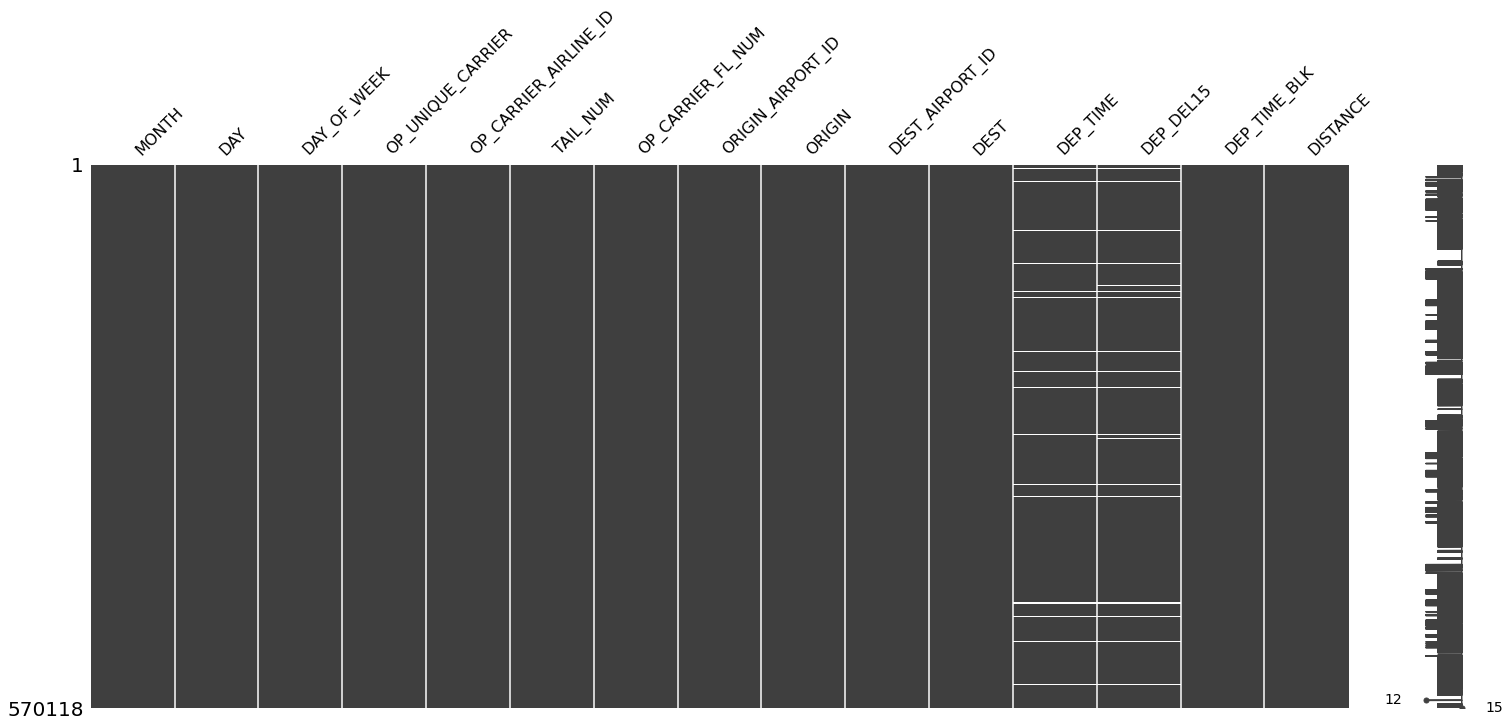

In [15]:
#To visualise missing data
print(df.isnull().sum())
msno.matrix(df)

### Dealing with missing values

As we can see, we have 3 attributes with missing values. In our opinion, for attributes such as tail number, the missing values are impossible to be imputed. 

To deal with it, we try to check whether the missing values are coming from the same rows or not.



In [16]:
#Check whether missing values come from the same rows
check=df.loc[df["DEP_DEL15"].isnull(), ["DEP_DEL15","DEP_TIME", "TAIL_NUM"]]
display(check)
print(check.isnull().sum())

,DEP_DEL15,DEP_TIME,TAIL_NUM
0,NaN,NaN,N279PQ
20,NaN,1358.0,N836AY
21,NaN,1358.0,N820AY
29,NaN,NaN,N8837B
30,NaN,NaN,N8683B
...,...,...,...
569792,NaN,NaN,N280AK
569800,NaN,NaN,N569AS
569810,NaN,NaN,N569AS
569826,NaN,NaN,N524AS


DEP_DEL15    17323
DEP_TIME     16823
TAIL_NUM      1969
dtype: int64


It is now confirmed that the rows with missing value of **DEP_DEL15**, have the missing values also for the **DEP_TIME** and also **TAIL_NUM**. 

Since our missing values are less than 5%, we decided to omit all the rows with missing values and check for the percentage of available data after removing it. Then, visualize with msno to check whether all rows are now cleaned or not. 

MONTH                    0
DAY                      0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
DISTANCE                 0
dtype: int64


96.96150621450296

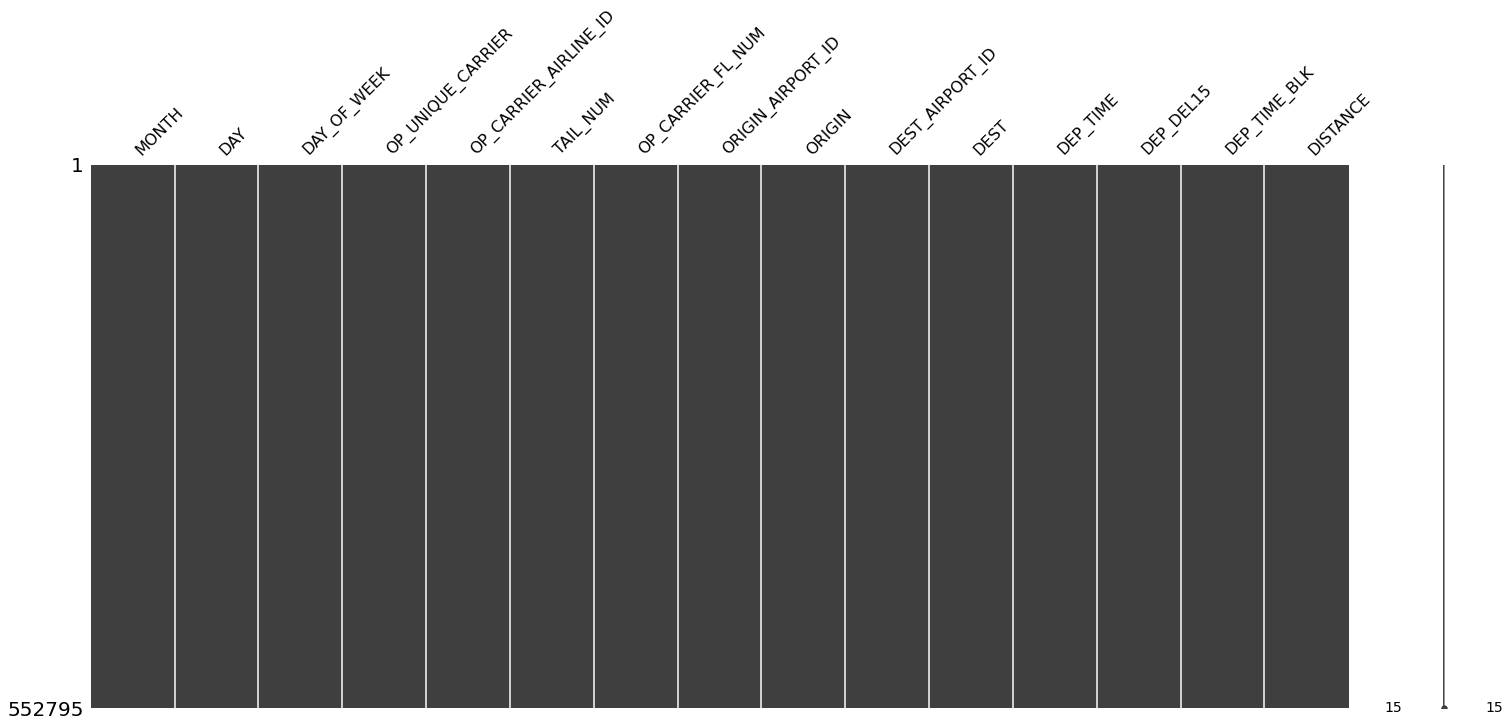

In [18]:
df= df.dropna(axis=0,subset=["TAIL_NUM", "DEP_TIME", "DEP_DEL15"]) 
print(df.isnull().sum())
msno.matrix(df)
# Percentage of available rows after dropping rows with missing values
(len(df)/570118)*100

### Saving the cleaned dataset

In [20]:
#Save the cleaned dataset
#df.to_csv("cleaned_data_jan2018.csv", index = False)

### Data Cleaning of January 2019 Dataset - Testing

The same data cleaning procedures are applied to the January 2019 dataset for testing.

In [24]:
# Import the January 2019 dataset
df19 = pd.read_csv("Jan19.csv", low_memory = False)

In [25]:
# Drop columns with missing values
df19 = df19.dropna(axis = 1, how = "all")
# Select relevant columns
df19 = df19.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,20,22,29,32,34,35,38,40,43,46,48,51,53,55,56,57,58,59]]
# Drop unused columns
df19 = df19.drop(["YEAR", "FL_DATE", "OP_CARRIER", "ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_SEQ_ID", "CANCELLED", "DIVERTED", 
             "TAXI_IN", "TAXI_OUT", "ARR_TIME", "ARR_DEL15", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", 
             "LATE_AIRCRAFT_DELAY", "CARRIER_DELAY", "AIR_TIME"], axis = 1)
df19 = df19.dropna(axis = 0, subset = ["TAIL_NUM", "DEP_TIME", "DEP_DEL15"])

In [26]:
df19.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE
0,1,3,4,9E,20363,N195PQ,5121,15412,TYS,10397,ATL,1205.0,1.0,1100-1159,152.0
1,1,4,5,9E,20363,N919XJ,5121,15412,TYS,10397,ATL,1250.0,1.0,1100-1159,152.0
2,1,5,6,9E,20363,N316PQ,5122,10397,ATL,14783,SGF,956.0,0.0,0900-0959,563.0
3,1,6,7,9E,20363,N325PQ,5122,10397,ATL,14783,SGF,945.0,0.0,0900-0959,563.0
4,1,7,1,9E,20363,N904XJ,5122,10397,ATL,14783,SGF,947.0,0.0,0900-0959,563.0


In [27]:
# Review the summary of the cleaned dataset
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567630 entries, 0 to 583984
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  567630 non-null  int64  
 1   DAY_OF_MONTH           567630 non-null  int64  
 2   DAY_OF_WEEK            567630 non-null  int64  
 3   OP_UNIQUE_CARRIER      567630 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  567630 non-null  int64  
 5   TAIL_NUM               567630 non-null  object 
 6   OP_CARRIER_FL_NUM      567630 non-null  int64  
 7   ORIGIN_AIRPORT_ID      567630 non-null  int64  
 8   ORIGIN                 567630 non-null  object 
 9   DEST_AIRPORT_ID        567630 non-null  int64  
 10  DEST                   567630 non-null  object 
 11  DEP_TIME               567630 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           567630 non-null  object 
 14  DISTANCE               567630 non-nu

In [28]:
#Save the cleaned dataset
#df19.to_csv("cleaned_data_jan2019.csv", index = False)

# Exploratory Data Analysis (EDA)

EDA starts with importing the cleaned January 2018 dataset. First, we explore the datatype and recheck the cleaned data.

In [30]:
jan18 = pd.read_csv(("cleaned_data_jan2018.csv"), low_memory=False)
jan18.dtypes     #Check data type

MONTH                      int64
DAY                        int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
DISTANCE                 float64
dtype: object

In [31]:
#Checking any null value
jan18.isnull().values.any()

False

Then, we build a correlation matrix to see the underlying factors between one attribute to another that contribute to flight delay.

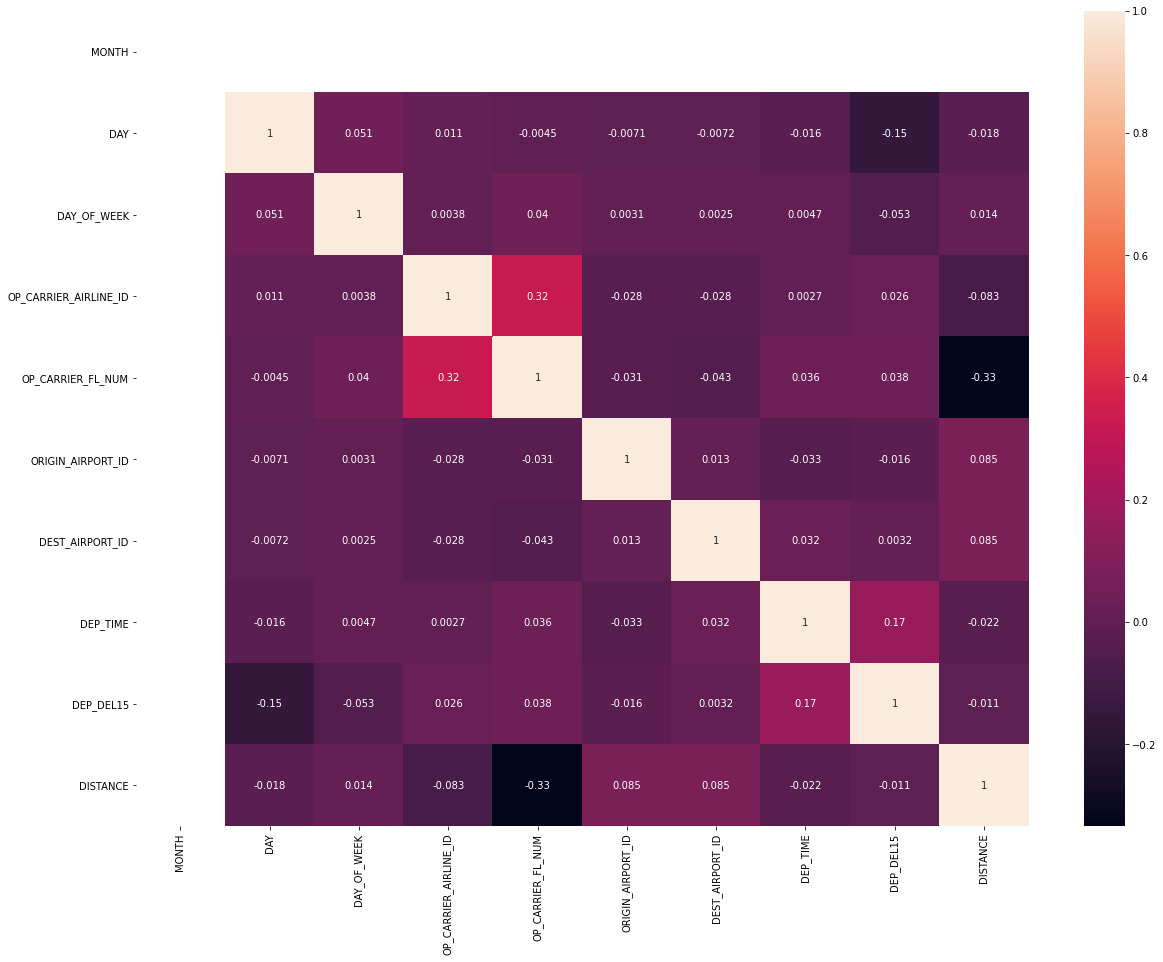

In [32]:
#Correlation matrix
df18 = jan18
corrMatrix = df18.corr()
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix,ax=ax, annot=True)
plt.show()

As **DEP_DEL15** is a targetted variable, we want to see the unique values it can return:



In [34]:
df18['DEP_DEL15'].value_counts()

0.0    453644
1.0     99151
Name: DEP_DEL15, dtype: int64

Obtaining the statistical summary:

In [36]:
df18.describe()

,MONTH,DAY,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DISTANCE
count,552795.0,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000
mean,1.0,16.087414,3.740622,19992.150940,2557.342572,12660.970989,12661.375436,1333.554368,0.179363,797.461337
std,0.0,8.995561,1.995600,396.822513,1882.338538,1517.905842,1518.067833,495.314692,0.383656,593.569162
min,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,10135.000000,1.000000,0.000000,31.000000
25%,1.0,8.000000,2.000000,19790.000000,912.000000,11292.000000,11292.000000,922.000000,0.000000,361.000000
50%,1.0,16.000000,4.000000,19977.000000,2011.000000,12889.000000,12889.000000,1329.000000,0.000000,634.000000
75%,1.0,24.000000,5.000000,20368.000000,4018.000000,13931.000000,13931.000000,1738.000000,0.000000,1034.000000
max,1.0,31.000000,7.000000,21171.000000,7439.000000,16218.000000,16218.000000,2400.000000,1.000000,4983.000000


Here are the airlines details:

|  Airlines Code   | Airline Name | 
| --- | --- |
| WN | Southwest Airlines |
| OO | Skywest Airlines |
| DL | Delta Airlines |
| AA | American Airlines |
| B6 | JetBlue Airways |
| UA | United Airways |
| OH | PSA Airlines |
| MQ | Envoy - American Eagles|
| YX | Republic Airways |
| EV | ExpressJet |
| 9E | Endeavor Air |
| YV | Mesa Airlines |
| F9 | Frontier Airlines |
| NK | Spirit Airlines |
| G4 | Allegiant Air |
| AS | Alaska Airlines |
| VX | Virgin America |
| HA | Hawaiaan Airlines |





Next, we want to visualize the on time performance vs departure delay by airlines. We also interested in knowing which Airlines recorded the highest departure delay throughout January 2018:

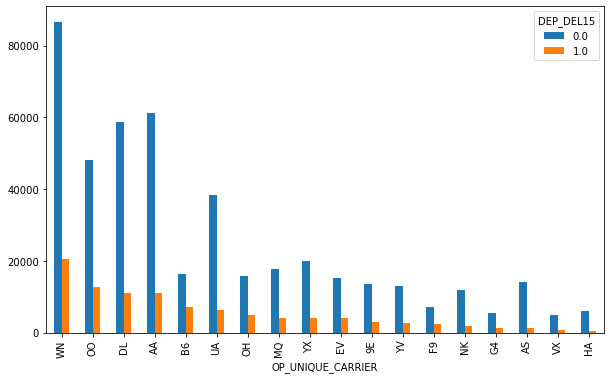

In [38]:
df18_carr = df18.groupby(['OP_UNIQUE_CARRIER']).DEP_DEL15.value_counts().unstack()
df18_carr.sort_values(1, ascending=False).plot(kind='bar', figsize=(10,6))

**Conclusion**:The Carrier Airline is ranked based on **DEP_DELAY**. B6 (JetBlue Airways) relatively shows a high delay ratio. Otherwise, the more the flights, the more the delay.

WN (Southwest Airlines) recorded the highest departure delay in January 2018.

Now, we want to see which **DAY_OF_WEEK** and which **DEP_TIME_BLK** has the highest flight departure delay:

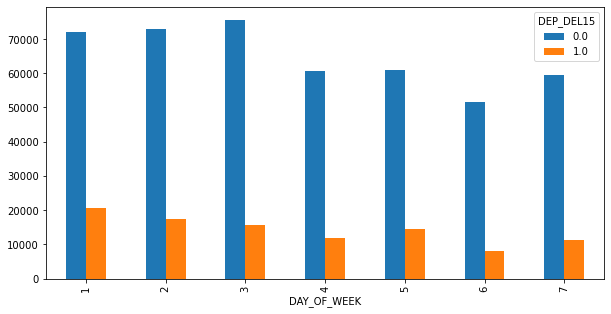

In [40]:
df18_Day = df18.groupby(['DAY_OF_WEEK']).DEP_DEL15.value_counts().unstack()
df18_Day.plot(kind='bar', figsize=(10,5))

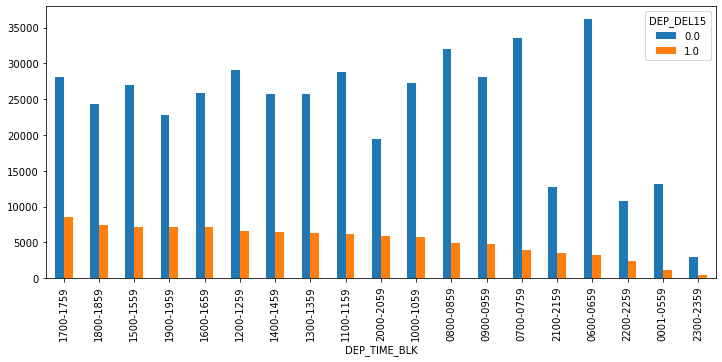

In [41]:
df18_TimeBlk = df18.groupby(['DEP_TIME_BLK']).DEP_DEL15.value_counts().unstack()
df18_TimeBlk = df18_TimeBlk.sort_values(1, ascending=False) #Sort descending by DEP_DEL15
df18_TimeBlk.plot(kind='bar', figsize=(12,5))

In [42]:
df_tb = df18.groupby(['DEP_TIME_BLK']).DEP_DEL15.value_counts().unstack()
df_tb['ratio'] = (df_tb[1]/df_tb[0])
df_tb.sort_values('ratio', ascending=False)

DEP_DEL15,0.0,1.0,ratio
DEP_TIME_BLK,,,
1900-1959,22785,7110,0.312047
1800-1859,24364,7490,0.307421
1700-1759,28147,8577,0.304722
2000-2059,19502,5849,0.299918
2100-2159,12688,3516,0.277112
1600-1659,25857,7103,0.274703
1500-1559,27028,7153,0.264651
1400-1459,25699,6510,0.253317
1300-1359,25697,6365,0.247694


**Conclusion**: We can conclude that Day 3(Wednesday) of week have relatively low ratio of delay, whereas Day 1(Monday) shows the highest departure delay. Most delays occur in 1700-1759 Blk. 1900-1959 has the greatest ratio of delay.

Possibility for departure delay is high during 6pm - 10pm

# Modeling

### Preparing the data for Modeling

We perform sampling with the sample() function by extracting **8000 rows in random from the 2018 dataset** and followed by **2000 rows in random from the 2019 dataset**. In the process, we make sure that the dataset is balanced with equal amount of observations for the target to be predicted, that is the DEP_DEL15 variable, ensuring that our final dataset has 5000 observations with DEP_DEL15 of 1 and another 5000 with DEP_DEL15 of 0 to eliminate any possibilities of biased data.

In [43]:
df18_Jan = pd.read_csv("cleaned_data_jan2018.csv")
df19_Jan = pd.read_csv("cleaned_data_jan2019.csv")

#df18.drop(['ARR_TIME', 'ARR_DEL15'], axis=1, inplace=True) # Drop ArrivalTime and ArrivalDelay as they will not be used 
#df19.drop(['ARR_TIME', 'ARR_DEL15'], axis=1, inplace=True)
#df18_Jan = df18[df18.MONTH==1] #Extract Jan data from the 2018 and 2019 data
#df19_Jan = df19[df19.MONTH==1]

df18_Jan_0 = df18_Jan[df18_Jan.DEP_DEL15==0].sample(n=4000) # Extract 4000 rows with no delay randomly
df18_Jan_1 = df18_Jan[df18_Jan.DEP_DEL15==1].sample(n=4000) # Extract 4000 rows with delay randomly
df18_Jan_Balanced = df18_Jan_0.append(df18_Jan_1) # Combine the df, with delay and without delay
df18_Jan_Balanced = df18_Jan_Balanced.sample(frac = 1) # Shuffle the rows of the combined df

df19_Jan_0 = df19_Jan[df19_Jan.DEP_DEL15==0].sample(n=1000)  # *The same objectve as above, but wth 2019 data
df19_Jan_1 = df19_Jan[df19_Jan.DEP_DEL15==1].sample(n=1000)
df19_Jan_Balanced = df19_Jan_0.append(df19_Jan_1)
df19_Jan_Balanced = df19_Jan_Balanced.sample(frac = 1)

df18_19sampled = df18_Jan_Balanced.append(df19_Jan_Balanced) # Append the sampled Jan 2018 df (8000 rows) with the sampled Jan 2019 df (2000 rows)
df18_19sampled.shape

(10000, 15)

We can see that from the output above using the shape attribute, it shows that the final sampled dataset consists of 10000 rows and 15 columns, with 8000 rows from the cleaned 2018 dataset and 2000 rows from cleaned 2019 dataset.

### Setting Up the Pycaret Environment for Modeling

Before starting to run any machine learning tasks in PyCaret, it is common to perform setup using the setup() function as the first mandatory step. In our case, the setup() function is used to perform the following tasks:
- **Define the size of training data:** Size of training data is set in the train_size parameter, in which 80% of the data is used for training and the remaining 20% will be used for testing.
- **Data Preparation:** Categorical variables are specified in the categorical_features parameter to enable the function to perform target encoding to convert the numeric variables to dummy variables.
- **Data shuffling:** For our dataset, there is no need to perform any shuffling so the parameter of data_split_shuffle is set to False. This is because we structured our dataset in which the first 80% of the rows are for training and the last 20% of the rows are for testing
- **Dialogue suppressing:** Since we are very sure about the data types for our dataset, the silent parameter is set to True to prevent PyCaret from displaying the confirmation messages of the data types. This parameter essentially does nothing but to a certain extent, setting the parameter to True can slightly speed up the setup process.
- **Feature selection:** When the feature_selection parameter is specified as True, PyCaret will perform selection of features using the ensemble filtering method that involves a combination of machine learning techniques. These techniques include algorithms like Random Forest, Adaboost and Linear correlation with the target feature as well. For our problem, the output feature subset size follows the default size as we did not specify the feature_selection_param parameter.

In [2]:
m1 = setup(data = df18_19sampled,
             train_size = 0.8, 
             target = 'DEP_DEL15',
             categorical_features = ['MONTH','DAY','DAY_OF_WEEK','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN','DEST_AIRPORT_ID','DEST','DEP_TIME_BLK'],
             data_split_shuffle = False,
             silent = True,
             feature_selection = True)

,Description,Value
0,session_id,6054
1,Target,DEP_DEL15
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10000, 15)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


There are a few things that we should take note from the output shown above. First, the output confirms the fact that our target output variable is a binary categorical variable that is either 0 or 1 as displayed in the Target Type at the 2nd index row. Second, it is also confirmed that there are no missing values in our dataset as seen in the Missing Values row at the 5th index row. Third, the transformed training data has 8000 rows and 8024 columns while the transformed testing data has 2000 rows and 8024 columns as shown in the Transformed Train Set at row index 11 and Transformed Test Set at row index 12 respectively. This tells us that the original data columns which originally contains 15 columns have increased to 8024 columns due to the large number of categorical variables being converted into encodings. 

### Comparing Training Accuracy of Models

By default, the compare_models() function performs 10-fold cross validation but for our case, we set the k-fold as 2 to do a brief comparison of the training accuracies for different models. The function outputs the average training accuracies with other metrics such as Area Under Curve (AUC), Precision, Recall, F1 Score, Kappa, MCC and Training Time in seconds (TT) after the trainings have been done.

In [3]:
# Compare training accuracy of a number of mahine learning models
compare_models(fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8380,0.9095,0.7748,0.8871,0.8271,0.6760,0.6816,18.505
xgboost,Extreme Gradient Boosting,0.8314,0.9062,0.7940,0.8583,0.8249,0.6627,0.6647,88.695
lightgbm,Light Gradient Boosting Machine,0.8306,0.9095,0.7888,0.8609,0.8232,0.6612,0.6636,1.575
dt,Decision Tree Classifier,0.8042,0.8043,0.7768,0.8221,0.7987,0.6085,0.6095,2.320
gbc,Gradient Boosting Classifier,0.7278,0.8072,0.7660,0.7118,0.7378,0.4555,0.4571,25.595
rf,Random Forest Classifier,0.6921,0.7624,0.7088,0.6862,0.6972,0.3843,0.3846,9.810
et,Extra Trees Classifier,0.6715,0.7333,0.6818,0.6685,0.6749,0.3430,0.3433,14.930
ada,Ada Boost Classifier,0.6652,0.7285,0.6880,0.6580,0.6722,0.3305,0.3313,10.615
lr,Logistic Regression,0.6640,0.7260,0.6780,0.6600,0.6688,0.3280,0.3282,50.465
qda,Quadratic Discriminant Analysis,0.6491,0.6491,0.5160,0.7126,0.5949,0.2982,0.3135,34.630


From the table shown above, it is obvious that the top 4 models that has the highest training accuracy, AUC, precision and recall are **CatBoost Classifier, Extreme Gradient Boosting, Light Gradient Boosting** and **Decision Tree models**. Based on this output, we will construct these 4 models individually for model testing and evaluation later.

## Build, Test and Evaluate Models

To build machine learning models, we use the create_model() function by specifying the type of model in the parameter of model ID as a string and the fold parameter to set the number of fold for cross validation. In our case, we specify **5-fold cross validation** for Extreme Gradient Boosting model and Decision Tree model, while only **3-fold cross validation** for Light Gradient Boosting Machine model.

### 1. Extreme Gradient Boosting

In [4]:
# Build the xgboost model
xgboost = create_model('xgboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8262,0.9076,0.7700,0.8676,0.8159,0.6525,0.6567
1,0.8494,0.9217,0.8138,0.8762,0.8438,0.6988,0.7005
2,0.8425,0.9190,0.8138,0.8634,0.8378,0.6850,0.6861
3,0.8362,0.9164,0.8075,0.8568,0.8314,0.6725,0.6736
4,0.8488,0.9193,0.8000,0.8864,0.8410,0.6975,0.7008
Mean,0.8406,0.9168,0.8010,0.8701,0.8340,0.6812,0.6836
SD,0.0086,0.0049,0.0163,0.0103,0.0099,0.0172,0.0168


The model output for training shows that the average training accuracy is 0.8406 which is pretty high, whereas the average recall and precision are 0.8010 and 0.8701 respectively. These measures will be used for comparison during model testing.

### Test and Evaluate the model

To evaluate the model on testing data, the plot_model() function is used. We specify the estimator parameter with the model object that we created previously and the plot parameter withe the metric that we wish to test and evaluate on the testing data.

#### i. Area Under Curve (AUC)

When looking at the ROC curve, we should take note that the x-axis shows the False Positive Rate while the y-axis shows the True Positive Rate. To interpret these axis, we can say that a **higher value in the x-axis implies that the amount of false positives are greater than true negatives**, while a **higher value in the y-axis tells us that the amount of true positives are greater than false negatives**. 

The ideal situation is the ROC curves for positive class and negative class do not intercept with each other at all, giving an AUC value of 1. In real situations, the curves will intercept, which in turns produce type 1 and type 2 error. This gives AUC values in the range between 0.5 and 1.

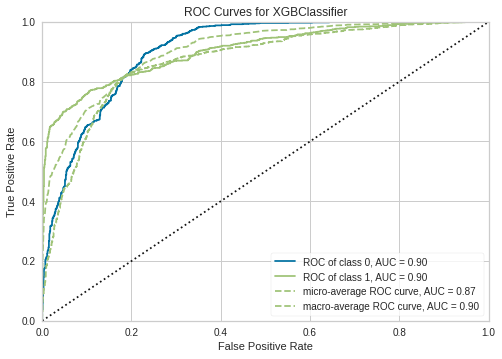

In [5]:
plot_model(estimator = xgboost, plot = 'auc')

The ROC graph shows that the ROC of class 0 and class 1 has AUC values of 0.9. The greater that value of AUC, the better it is for the algorithm to classify observations of class 0 as 0 and class 1 as 1. To interpret this in our problem, this means that the XGB Classifier model has 90% probability in classifying delayed flights as delayed and non-delayed flights as not delayed which is pretty high.

#### ii. Learning Curve

A learning curve is used to assess the **relationship between the training score and the cross validation score** based on the increasing amount of training data. It is mainly used to check if the model can take advantage of having more data, which is also an indication of whether the data is sufficient of not. It is also used to see if the model's performance is affected by error due to variance or error due to bias. To identify if the model is suffering from variance or bias, we can check if there is any large variability around the training score (bias) or the validation score (variance).

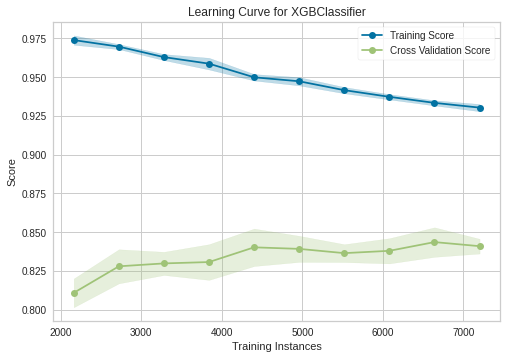

In [34]:
plot_model(estimator = xgboost, plot = 'learning')

The learning curves shown in the graph display slow convergence of both curves together as the training data instances increase, indicating that the model will benefit from more training data to generalize better. Besides, we can also observe that there are not much variation in both curves, with the degree of variability in validation score being slightly higher than training score. Overall, this is a fairly good model that does not suffer greatly from bias or variance.

#### iii. Confusion Matrix

A confusion matrix can be described as a matrix that shows the **summary of the model's classification** of the target variable in the data. It shows that correct and wrong predictions with the respectively counts for each of the positive and negative class. It can be used to check the rate of false positive (type 1 error) and false negative (type 2 error) as these are the primary measures that determines the model's usability for the problem.

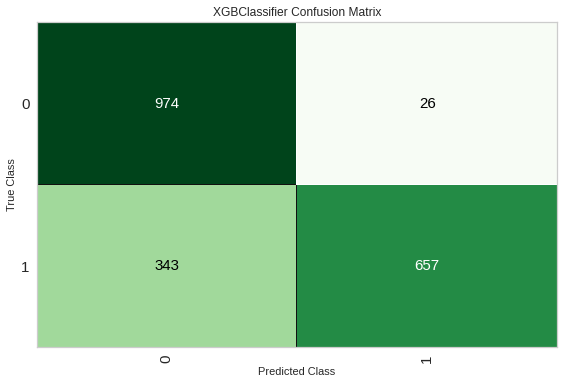

In [15]:
plot_model(estimator = xgboost, plot = 'confusion_matrix')

Looking at the confusion matrix, we can immediately notice that the model is very good in predicting non-delayed flights correctly as shown in the class 0 results, with 974 correctly predicted observations and only 26 falsely predicted observations. As for delayed flights which is shown in the class 1 results, the model performs worse with 657 correctly predicted observations compared to 343 wrongly predicted observations. This tells us that the model has a higher rate of false negatives than false positives.

To integrate this result to our flight delay prediction problem, it essentially says that our prediction model has a very high probability of classifying a delayed flight as not delayed compared to classifying a non-delayed flight as delayed.

#### iv. Classification Report

The classification report can be displayed with the plot_model() function as well, which shows the model's prediction metrics involving **precision, recall, F1 score and support scores**.

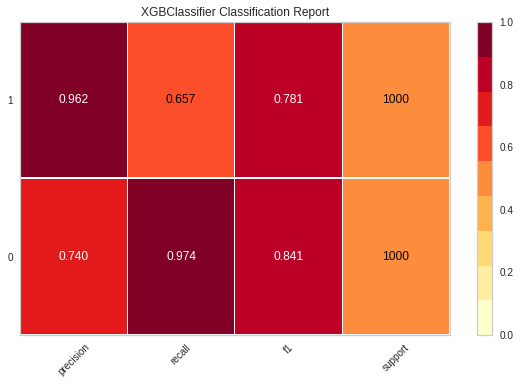

In [16]:
plot_model(estimator = xgboost, plot = 'class_report')

From the classification report shown above, it shows that our model has high precision value of 0.962 and very low recall value of 0.657 for positive class, implying the fact that our model has very low rate of false positives but a very high rate of false negatives when being compared. As for negative class, we can see that our model has low precision value of 0.740 and very high recall of 0.974, proving the same point that the model has low false positive rate and high false negative rate.

#### v. Feature Importance

The feature importance plot shows the **top 10 most important features** that contribute to the results of the model predictions. It is noted that the features generated from the output includes the features that have been transformed during the pre-processing that was done while executing the PyCaret setup function.

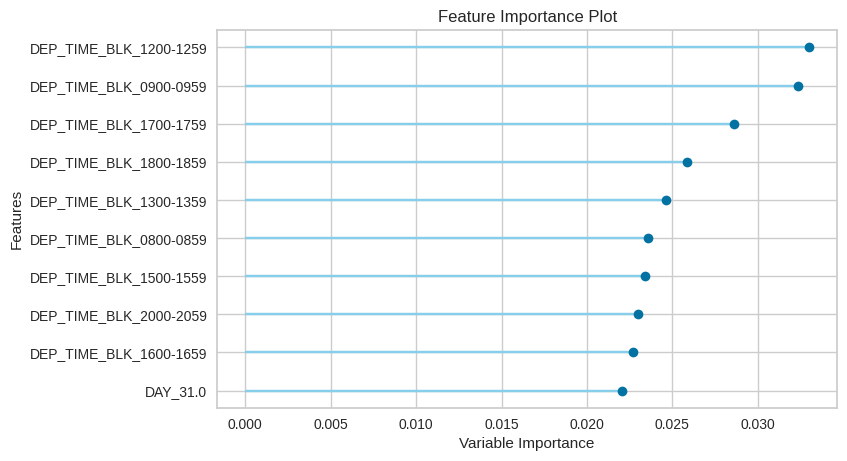

In [ ]:
plot_model(estimator = xgboost, plot = 'feature')

It is discovered that among the top 10 features that are displayed in the output for the Extreme Gradient Boosting model, 9 of them are derived from the same categorical feature, that is the DEP_TIME_BLK column, while the 10th feature is DAY_31.0. This shows that **DEP_TIME_BLK** is the most important feature from the original columns, followed by **DAY** column.

### 2. Decision Tree

In [7]:
# Build the decision tree model
dt = create_model('dt', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8138,0.8138,0.7812,0.8356,0.8075,0.6275,0.6288
1,0.8119,0.8119,0.8075,0.8146,0.8110,0.6238,0.6238
2,0.8144,0.8144,0.7900,0.8305,0.8097,0.6287,0.6295
3,0.8088,0.8088,0.7875,0.8225,0.8046,0.6175,0.6181
4,0.8056,0.8056,0.7800,0.8221,0.8005,0.6113,0.6121
Mean,0.8109,0.8109,0.7892,0.8251,0.8067,0.6217,0.6224
SD,0.0033,0.0033,0.0099,0.0073,0.0038,0.0065,0.0066


The output for the decision tree model training shows that the average training accuracy is 0.8109 which is fairly high, whereas the average recall and precision are 0.7892 and 0.8251 respectively. These measures will be used for comparison during model testing.

### Test and Evaluate the Model

#### i. Area Under Curve (AUC)

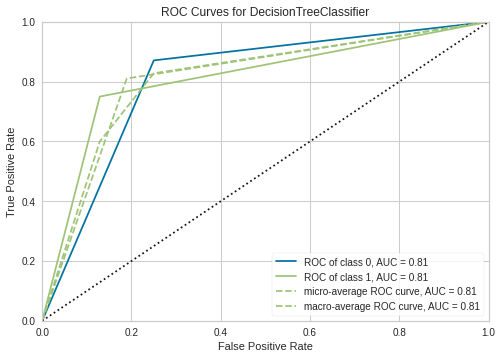

In [19]:
plot_model(estimator = dt, plot = 'auc')

The ROC graph shows that the ROC of class 0 and class 1 has AUC values of 0.81. The greater that value of AUC, the better it is for the algorithm to classify observations of class 0 as 0 and class 1 as 1. To interpret this in our problem, this means that the Decision Tree Classifier model has 81% probability in classifying delayed flights as delayed and non-delayed flights as not delayed which is considerably high.

#### ii. Learning Curve

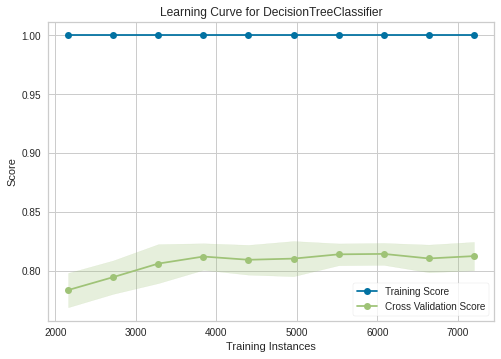

In [20]:
plot_model(estimator = dt, plot = 'learning')

The learning curves shown in the graph display slow and slight convergence of both curves together as the training data instances increase, indicating that the model will benefit from more training data to generalize better. Besides, we can also observe that there are not much variation in both curves, with the degree of variability in validation score being slightly higher than training score. Overall, this is a fairly good model that does not suffer greatly from bias or variance.

#### iii. Confusion Matrix

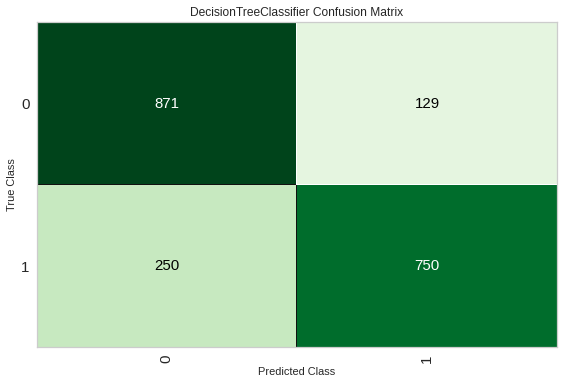

In [21]:
plot_model(estimator = dt, plot = 'confusion_matrix')

Looking at the confusion matrix, we notice that the model is good in predicting non-delayed flights correctly as shown in the class 0 results, with 871 correctly predicted observations and only 129 falsely predicted observations. As for delayed flights which is shown in the class 1 results, the model performs not as good as predicting non-delayed flights with 750 correctly predicted observations compared to 250 wrongly predicted observations. This tells us that the model has a higher rate of false negatives than false positives. It is also noted that this decision tree model performs better in predicting delayed flights compared to the XGBoost model.

Integrating this result to our flight delay prediction problem, it essentially says that our prediction model has a high probability of classifying a delayed flight as not delayed compared to classifying a non-delayed flight as delayed, similar to the XGBoost model.

#### iv. Classification Report

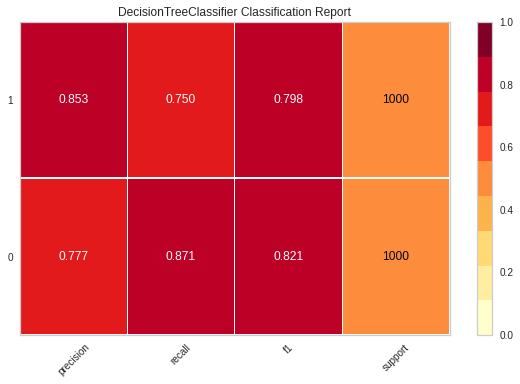

In [22]:
plot_model(estimator = dt, plot = 'class_report')

From the classification report shown above, it shows that our model has high precision value of 0.853 and low recall value of 0.750 for positive class, implying the fact that our model has low rate of false positives but a high rate of false negatives when being compared. As for negative class, we can see that our model has low precision value of 0.777 and high recall of 0.871, proving the same point that the model has low false positive rate and high false negative rate. However, this model has higher recall for class 1 and higher precision for class 0, indicating that the number of false negatives for this decision tree model is lower than the XGBoost model.

#### v. Feature Importance

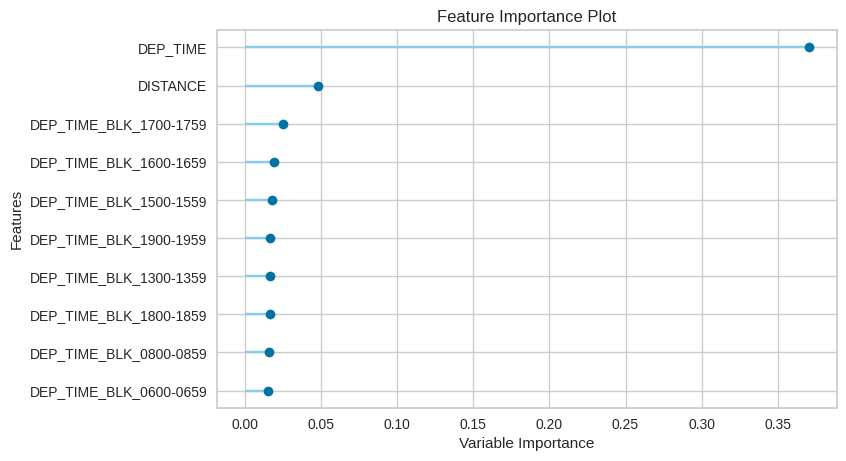

In [23]:
plot_model(estimator = dt, plot = 'feature')

The plot above informs that among the top 10 features that are displayed in the output for the Decision Tree model, 8 of them are derived from the same categorical feature, that is the DEP_TIME_BLK column, while the 1st and 2nd features are DEP_TIME and DISTANCE respectively. It is also observed that DEP_TIME appears to be far more important than the remaining 9 features. 

Overall, this plot shows that **DEP_TIME** is the most important feature from the original columns, followed by **DISTANCE** and **DEP_TIME_BLK** columns.

### 3. Light Gradient Boosting Machine

In [9]:
# Build the lightgbm model
lightgbm = create_model('lightgbm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8343,0.9136,0.7841,0.8717,0.8256,0.6686,0.6720
1,0.8399,0.9119,0.8050,0.8653,0.8340,0.6798,0.6814
2,0.8413,0.9191,0.7862,0.8836,0.8321,0.6827,0.6869
Mean,0.8385,0.9149,0.7918,0.8735,0.8306,0.6770,0.6801
SD,0.0030,0.0031,0.0094,0.0076,0.0036,0.0061,0.0062


The model output for training shows that the average training accuracy is 0.8385 which is pretty high, whereas the average recall and precision are 0.7918 and 0.8735 respectively. These measures will be used for comparison during model testing.

### Test and Evaluate the Model

#### i. Area Under Curve (AUC)

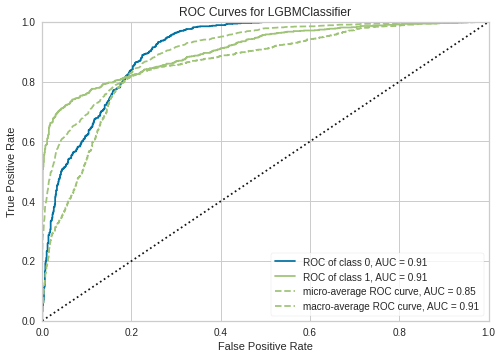

In [24]:
plot_model(estimator = lightgbm, plot = 'auc')

The ROC graph shows that the ROC of class 0 and class 1 has AUC values of 0.91. The greater that value of AUC, the better it is for the algorithm to classify observations of class 0 as 0 and class 1 as 1. To interpret this in our problem, this means that the LGBM Classifier model has 91% probability in classifying delayed flights as delayed and non-delayed flights as not delayed which is pretty high.

#### ii. Learning Curve

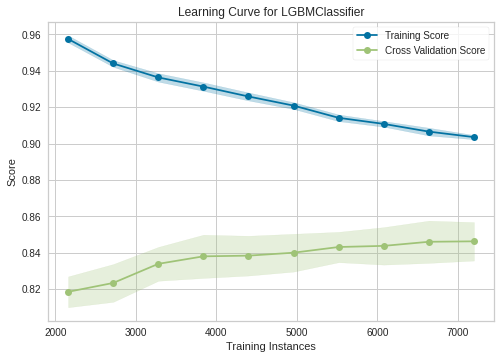

In [25]:
plot_model(estimator = lightgbm, plot = 'learning')

The learning curves shown in the graph display significant convergence of both curves together as the training data instances increase, indicating that the model will benefit significantly from more training data to generalize better. Besides, we can also observe that there are not much variation in both curves, with the degree of variability in validation score being slightly higher than training score. Overall, this is a good model that does not suffer greatly from bias or variance.

#### iii. Confusion Matrix

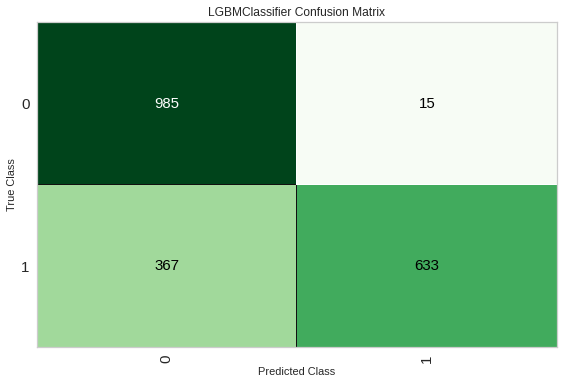

In [26]:
plot_model(estimator = lightgbm, plot = 'confusion_matrix')

While viewing the confusion matrix above, we notice that the model is extremely good in predicting non-delayed flights correctly as shown in the class 0 results, with 985 correctly predicted observations and only 15 falsely predicted observations. As for delayed flights which is shown in the class 1 results, the model performs significantly worse than predicting non-delayed flights with 633 correctly predicted observations compared to 367 wrongly predicted observations. This tells us that the model has a higher rate of false negatives than false positives. Moreover, this LGBM model performs worse in predicting delayed flights compared to both the XGBoost model and Decision Tree model.

To explain this result based on our flight delay prediction problem, it essentially tells us that our prediction model has a very high probability of classifying a delayed flight as not delayed compared to classifying a non-delayed flight as delayed, similar to the XGBoost model.

#### iv. Classification Report

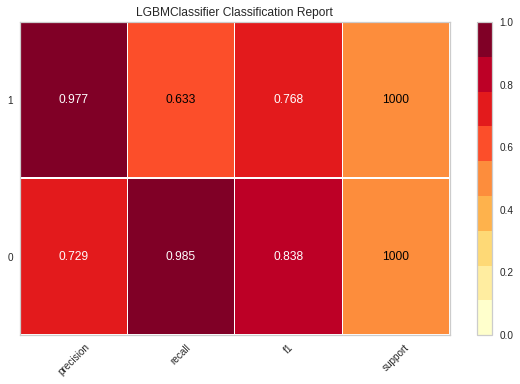

In [27]:
plot_model(estimator = lightgbm, plot = 'class_report')

When looking at the classification report, it shows that our model has high precision value of 0.977 and very low recall value of 0.633 for positive class, implying the fact that our model has very low rate of false positives but a very high rate of false negatives when being compared. As for negative class, we can see that our model has low precision value of 0.729 and very high recall of 0.985, proving the same point that the model has low false positive rate and high false negative rate. Similar to the XGBoost model, this model has very low recall for class 1 and very low precision for class 0, indicating that the number of false negatives for this LGBM model is greater than the Decision Tree model.

#### v. Feature Importance

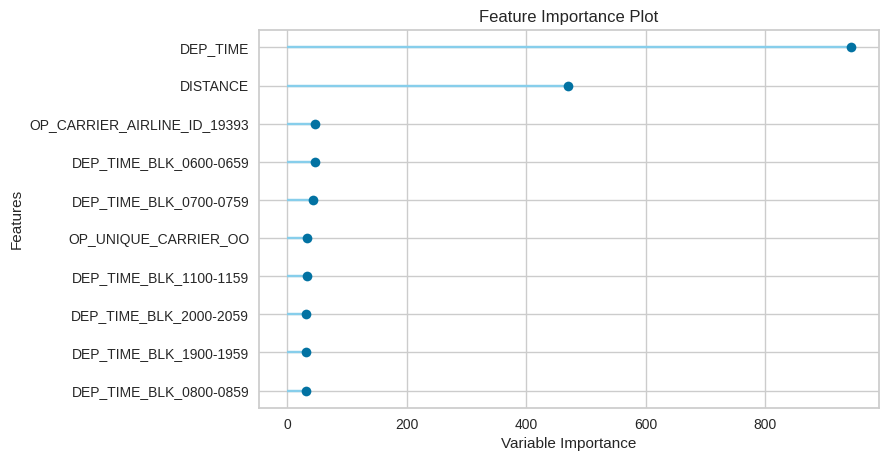

In [28]:
plot_model(estimator = lightgbm, plot = 'feature')

Viewing the plot above, it informs us that among the top 10 features that are displayed in the output for the LGBM model, 6 of them are derived from the same categorical feature, that is the DEP_TIME_BLK column, while the 1st, 2nd, 3rd and 6th features are DEP_TIME, DISTANCE, OP_CARRIER_AIRLINE_ID_19393 and OP_UNIQUE_CARRIER_OO respectively. It is also observed that DEP_TIME and DISTANCE appear to be far more important than the remaining 8 features. 

Overall, this plot shows that **DEP_TIME** is the most important feature from the original columns, followed by **DISTANCE**, **OP_CARRIER_AIRLINE_ID**, **DEP_TIME_BLK** and **OP_UNIQUE_CARRIER** columns. 

### 4. CatBoost Classifier

In [12]:
# Build the catboost model
catboost = create_model('catboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8406,0.9160,0.7699,0.8969,0.8286,0.6813,0.6883
1,0.8429,0.9093,0.7869,0.8860,0.8335,0.6858,0.6901
2,0.8462,0.9216,0.7644,0.9139,0.8325,0.6924,0.7019
Mean,0.8433,0.9156,0.7738,0.8989,0.8315,0.6865,0.6934
SD,0.0023,0.0050,0.0096,0.0115,0.0021,0.0046,0.0060


The output for the catboost classifier model training shows that the average training accuracy is 0.8433 which is high, whereas the average recall and precision are 0.7738 and 0.8989 respectively. These measures will be used for comparison during model testing.

#### i. Area Under Curve (AUC)

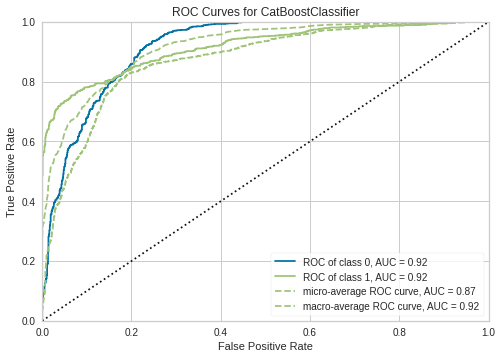

In [29]:
plot_model(estimator = catboost, plot = 'auc')

The ROC graph shows that the ROC of class 0 and class 1 has AUC values of 0.92. The greater that value of AUC, the better it is for the algorithm to classify observations of class 0 as 0 and class 1 as 1. To interpret this in our problem, this means that the Decision Tree Classifier model has 92% probability in classifying delayed flights as delayed and non-delayed flights as not delayed which is quite high.

#### ii. Learning Curve

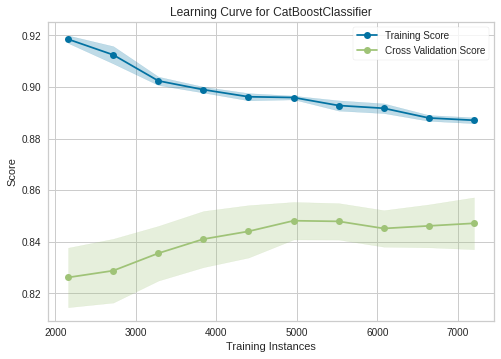

In [30]:
plot_model(estimator = catboost, plot = 'learning')

The learning curves shown in the graph display slow but noticeable convergence of both curves together as the training data instances increase, indicating that the model will benefit significantly from more training data to generalize better. Besides, we can also observe that there are not much variation in both curves, with the degree of variability in validation score being slightly higher than training score. Overall, this is a good model that does not suffer greatly from bias or variance.

#### iii. Confusion Matrix

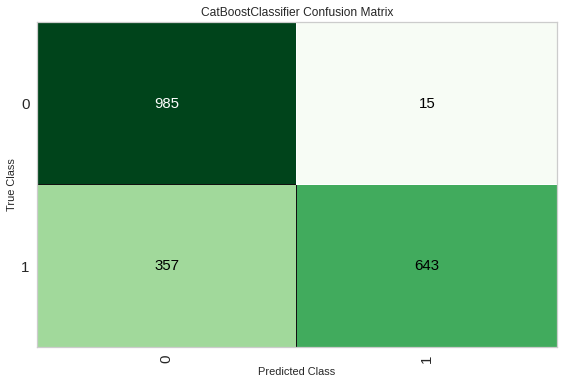

In [31]:
plot_model(estimator = catboost, plot = 'confusion_matrix')

Looking at the confusion matrix, we notice that the model is extremely good in predicting non-delayed flights correctly as shown in the class 0 results, with 985 correctly predicted observations and only 15 falsely predicted observations. As for delayed flights which is shown in the class 1 results, the model performs significantly worse than predicting non-delayed flights with 643 correctly predicted observations compared to 357 wrongly predicted observations. This tells us that the model has a higher rate of false negatives than false positives. In addition, this CatBoost classifier model performs slightly better than the LGBM model but worse in predicting delayed flights when comparing to both the XGBoost mdel and the Decision Tree model.

Interpreting this result using our flight delay prediction problem, it essentially tells us that our prediction model has a very high probability of classifying a delayed flight as not delayed compared to classifying a non-delayed flight as delayed, similar to the XGBoost model and LGBM model.

#### iv. Classification Report

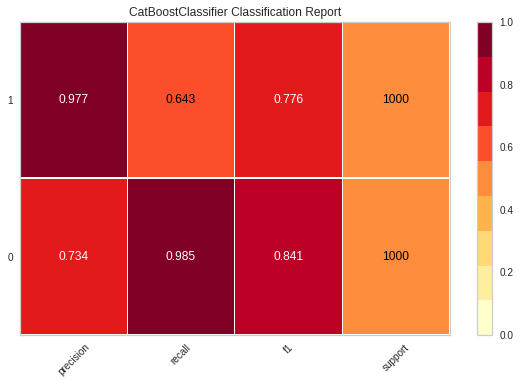

In [32]:
plot_model(estimator = catboost, plot = 'class_report')

From the classification report shown above, it shows that our model has high precision value of 0.977 and very low recall value of 0.643 for positive class, signifying the fact that our model has low rate of false positives but a high rate of false negatives when being compared. As for negative class, we can see that our model has low precision value of 0.734 and very high recall of 0.985, proving the same point that the model has low false positive rate and high false negative rate. Like the XGBoost model and the LGBM model, the CatBoost classifier model has very low recall for class 1 and very low precision for class 0, showing us that the number of false negatives for this CatBoost classifier model is higher than the Decision Tree model.

#### v. Feature Importance

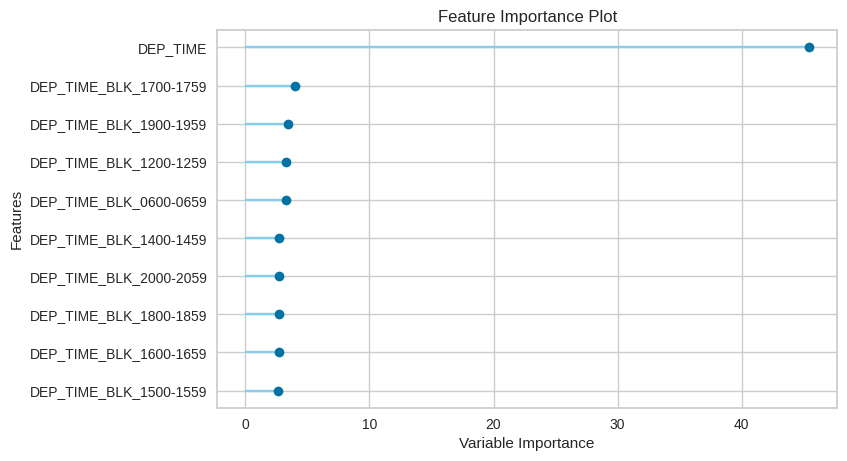

In [33]:
plot_model(estimator = catboost, plot = 'feature')

The plot above informs that among the top 10 features that are displayed in the output for the Decision Tree model, 8 of them are derived from the same categorical feature, that is the DEP_TIME_BLK column, while the 1st feature is DEP_TIME. It is also observed that DEP_TIME appears to be far more important than the remaining 9 features.

Overall, this plot shows that **DEP_TIME** is the most important feature from the original columns, followed by **DEP_TIME_BLK**.

## Model Evaluation - Final Model to Choose

To conclude our evaluation, the **Decision Tree classifier model** is chosen as the final best model. This is because:
- The model has reasonably high average accuracy of 0.8109.
- The average recall and precision for this model are 0.7892 and 0.8251 respectively which are acceptable.
- The model has a **lower rate of False Negatives** compared to the other 3 models, which means this model **performs best at predicting delayed flights as delayed** among the top 4 models. As shown in the confusion matrix, the model correctly predicts 750 delayed flights as delayed and only 250 delayed flights are wrongly predicted as not delayed.
- In the flight delay problem, we want the False Negative rate of our final model to be as low as possible because in real life situation, falsely informing customers that a delayed flight is not delayed is much worse than predicting that a non-delayed flight is delayed.

# Final Analysis/ Conclusion


- The prediction of flight delay can be evaluated through various machine learning models such as Extreme Gradient Boosting, Decision Tree, Light Gradient Boosting Machine and CatBoost Classifier, in which all of them show accuracy of more than 80%.

- We found that there is a correlation between flight informations and the probability of the flight being delayed. Based on the feature importance analysis on each of the tested machine learning algorithm, it is apparent that the departure time as a variable has the highest correlation on the probability of flight delay.





## References:

- Surya Teja, K. P., Reddy, V., & Subhani, S. (2019). Flight delay prediction using machine learning algorithm xgboost. Journal of Advanced Research in Dynamical and Control Systems, 11(5), 379–388.
- Chandraa, P., Prabakaran, N., & Kannadasan, R. (2018). Airline delay predictions using supervised machine learning. International Journal of Pure and Applied Mathematics, 119(Special Issue  7A).
- Kuhn, N., & Jamadagni, N. (2017). Application of Machine Learning Algorithms to Predict Flight Arrival Delays. Cs229, 1–6.
- Bhandari, A. (16 June, 2020). AUC-ROC Curve in Machine Learning Clearly Explained. Retrieved from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
- Brownlee, J. (15 August, 2020). What is a Confusion Matrix in Machine Learning. Retrieved from Machine Learning Mastery: https://machinelearningmastery.com/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20summary%20of%20prediction%20results%20on,in%20which%20your%20classification%20model
- Learning Curve. (2019). Retrieved from Yellowbrick: https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
- Narkhede, S. (27 June, 2018). Understanding AUC - ROC Curve. Retrieved from Towards Data Science: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=AUC%20%2D%20ROC%20curve%20is%20a,problem%20at%20various%20thresholds%20settings.&text=By%20analogy%2C%20Higher%20the%20AUC,is%20on%20the%20x%2Daxis.